In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s
import sklearn 
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler

In [2]:
import random

def online_payment():
  """Generates an online payment CSV file with 10 rows."""

  with open("online_payment_data.csv", "w") as f:
    f.write("order_id,customer_id,amount,payment_method,status,nameOrig,nameDest,isFraud\n")
    for i in range(10):
      order_id = str(random.randint(10000, 99999))
      customer_id = str(random.randint(100, 999))
      amount = random.randint(100, 1000)
      payment_method = random.choice(["Credit Card", "Debit Card", "PayPal"])
      status = random.choice(["Pending", "Completed", "Declined"])
      nameOrig = random.choice(["John Doe", "Jane Doe", "Peter Smith"])
      nameDest = random.choice(["Jane Doe", "John Smith", "Mary Johnson"])
      isFraud = random.choice([0, 1])
      f.write(f"{order_id},{customer_id},{amount},{payment_method},{status},{nameOrig},{nameDest},{isFraud}\n")


online_payment

<function __main__.online_payment()>

In [3]:
import pandas as pd
df=pd.read_csv("online_payment_data.csv")

In [4]:
df.head()

,order_id,customer_id,amount,payment_method,status,nameOrig,nameDest,isFraud
0,29475,288,945,PayPal,Declined,John Doe,Mary Johnson,0
1,53440,615,927,Credit Card,Declined,John Doe,John Smith,1
2,18777,258,354,PayPal,Pending,Peter Smith,Mary Johnson,0
3,66425,395,842,Credit Card,Pending,John Doe,Jane Doe,0
4,57631,477,225,Credit Card,Completed,Peter Smith,John Smith,1


In [5]:
df.tail()

,order_id,customer_id,amount,payment_method,status,nameOrig,nameDest,isFraud
5,39442,392,332,Debit Card,Declined,Peter Smith,Jane Doe,1
6,15065,919,538,PayPal,Declined,Jane Doe,Jane Doe,0
7,93837,964,264,PayPal,Pending,Peter Smith,Jane Doe,1
8,96327,185,746,Debit Card,Declined,Jane Doe,Jane Doe,1
9,68814,843,240,PayPal,Completed,Peter Smith,Jane Doe,1


In [6]:
df.shape

(10, 8)

In [7]:
df.size

80

In [8]:
df.count()

order_id          10
customer_id       10
amount            10
payment_method    10
status            10
nameOrig          10
nameDest          10
isFraud           10
dtype: int64

In [9]:
df.value_counts()

order_id  customer_id  amount  payment_method  status     nameOrig     nameDest      isFraud
15065     919          538     PayPal          Declined   Jane Doe     Jane Doe      0          1
18777     258          354     PayPal          Pending    Peter Smith  Mary Johnson  0          1
29475     288          945     PayPal          Declined   John Doe     Mary Johnson  0          1
39442     392          332     Debit Card      Declined   Peter Smith  Jane Doe      1          1
53440     615          927     Credit Card     Declined   John Doe     John Smith    1          1
57631     477          225     Credit Card     Completed  Peter Smith  John Smith    1          1
66425     395          842     Credit Card     Pending    John Doe     Jane Doe      0          1
68814     843          240     PayPal          Completed  Peter Smith  Jane Doe      1          1
93837     964          264     PayPal          Pending    Peter Smith  Jane Doe      1          1
96327     185          74

In [10]:
df.describe()

,order_id,customer_id,amount,isFraud
count,10.000000,10.000000,10.000000,10.000000
mean,53923.300000,533.600000,541.300000,0.600000
std,28549.840619,286.044363,296.401023,0.516398
min,15065.000000,185.000000,225.000000,0.000000
25%,31966.750000,314.000000,281.000000,0.000000
50%,55535.500000,436.000000,446.000000,1.000000
75%,68216.750000,786.000000,818.000000,1.000000
max,96327.000000,964.000000,945.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        10 non-null     int64 
 1   customer_id     10 non-null     int64 
 2   amount          10 non-null     int64 
 3   payment_method  10 non-null     object
 4   status          10 non-null     object
 5   nameOrig        10 non-null     object
 6   nameDest        10 non-null     object
 7   isFraud         10 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 768.0+ bytes


In [12]:
df.isnull().sum()

order_id          0
customer_id       0
amount            0
payment_method    0
status            0
nameOrig          0
nameDest          0
isFraud           0
dtype: int64

In [13]:
objects=(df.dtypes=='object')
object_column=list(objects[objects].index)
len(object_column)

4

In [14]:
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
len(num_cols)
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
len(fl_cols)

0

<AxesSubplot: xlabel='payment_method', ylabel='count'>

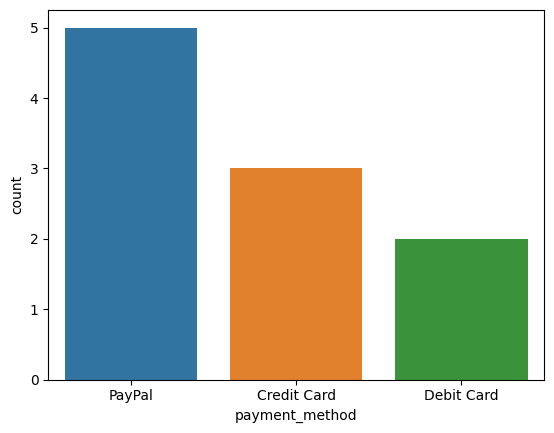

In [15]:
import seaborn as sb
sb.countplot(x='payment_method',data=df)

<AxesSubplot: xlabel='payment_method', ylabel='amount'>

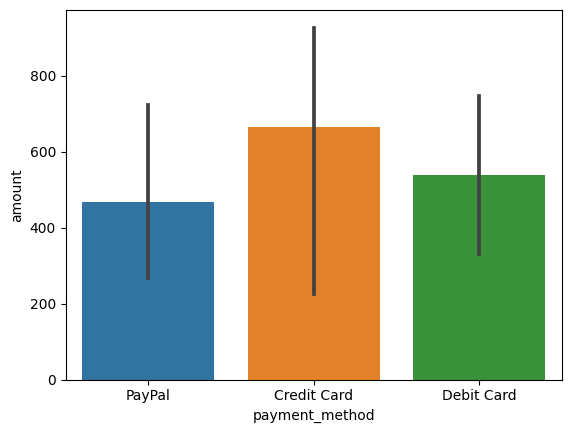

In [16]:
sb.barplot(x='payment_method',y='amount',data=df)

<Figure size 1000x1000 with 0 Axes>

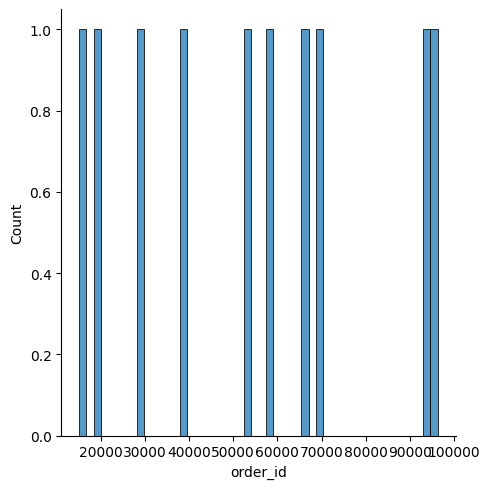

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sb.displot(df['order_id'],bins=50)

<AxesSubplot: >

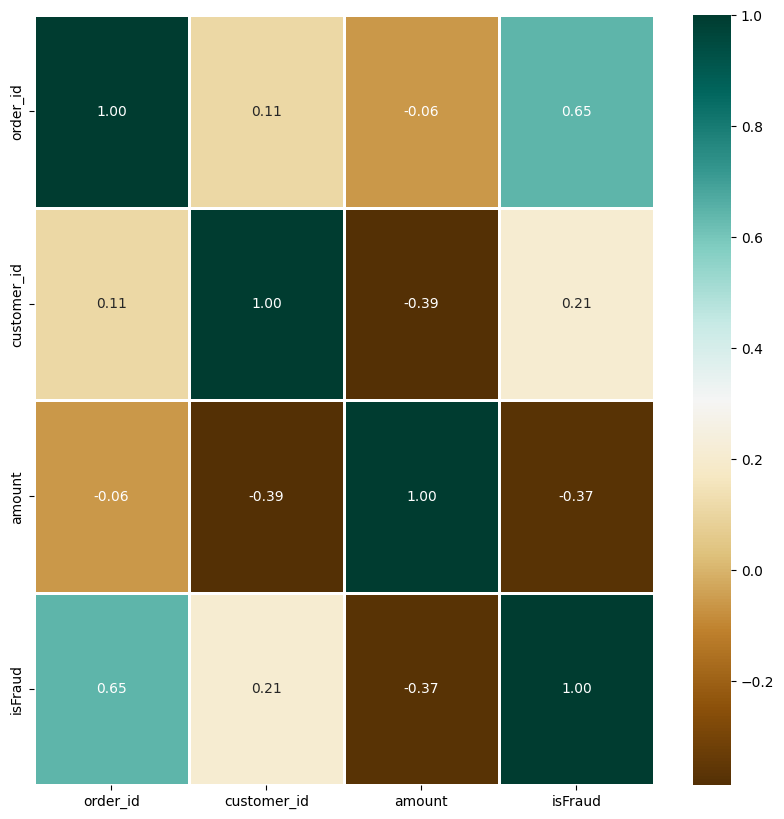

In [18]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

In [19]:
type_new = pd.get_dummies(df['payment_method'], drop_first=True)
df_new = pd.concat([df, type_new], axis=1)
df_new.head()

,order_id,customer_id,amount,payment_method,status,nameOrig,nameDest,isFraud,Debit Card,PayPal
0,29475,288,945,PayPal,Declined,John Doe,Mary Johnson,0,0,1
1,53440,615,927,Credit Card,Declined,John Doe,John Smith,1,0,0
2,18777,258,354,PayPal,Pending,Peter Smith,Mary Johnson,0,0,1
3,66425,395,842,Credit Card,Pending,John Doe,Jane Doe,0,0,0
4,57631,477,225,Credit Card,Completed,Peter Smith,John Smith,1,0,0


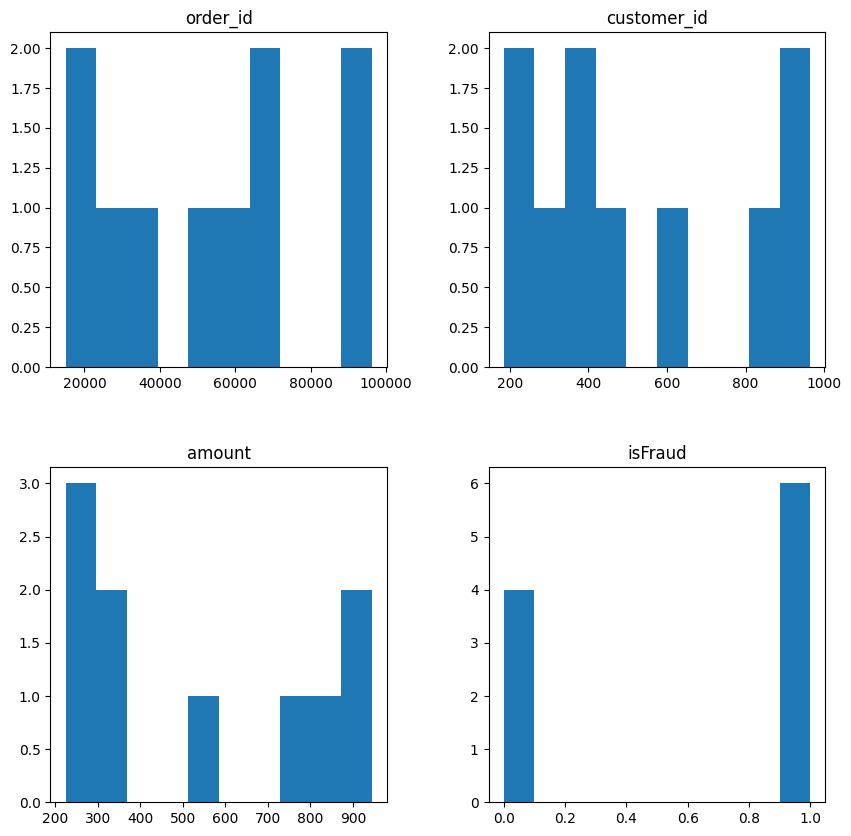

In [20]:
df.hist(grid=False,bins=10,figsize=(10,10))
plt.show()

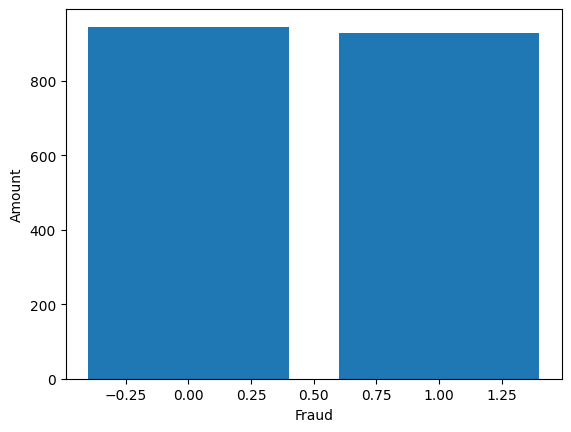

In [21]:
plt.bar(df['isFraud'],df['amount'])
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.show()

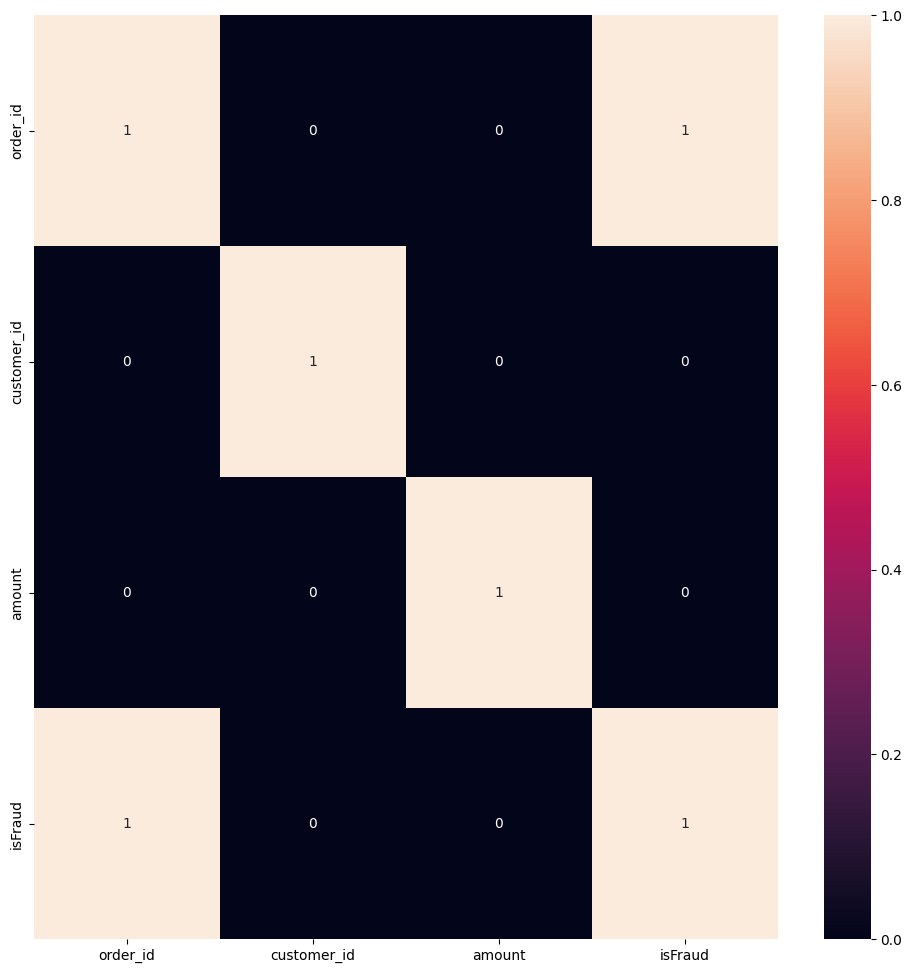

In [22]:
import seaborn as sb
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.4, annot=True, cbar=True)
plt.show()

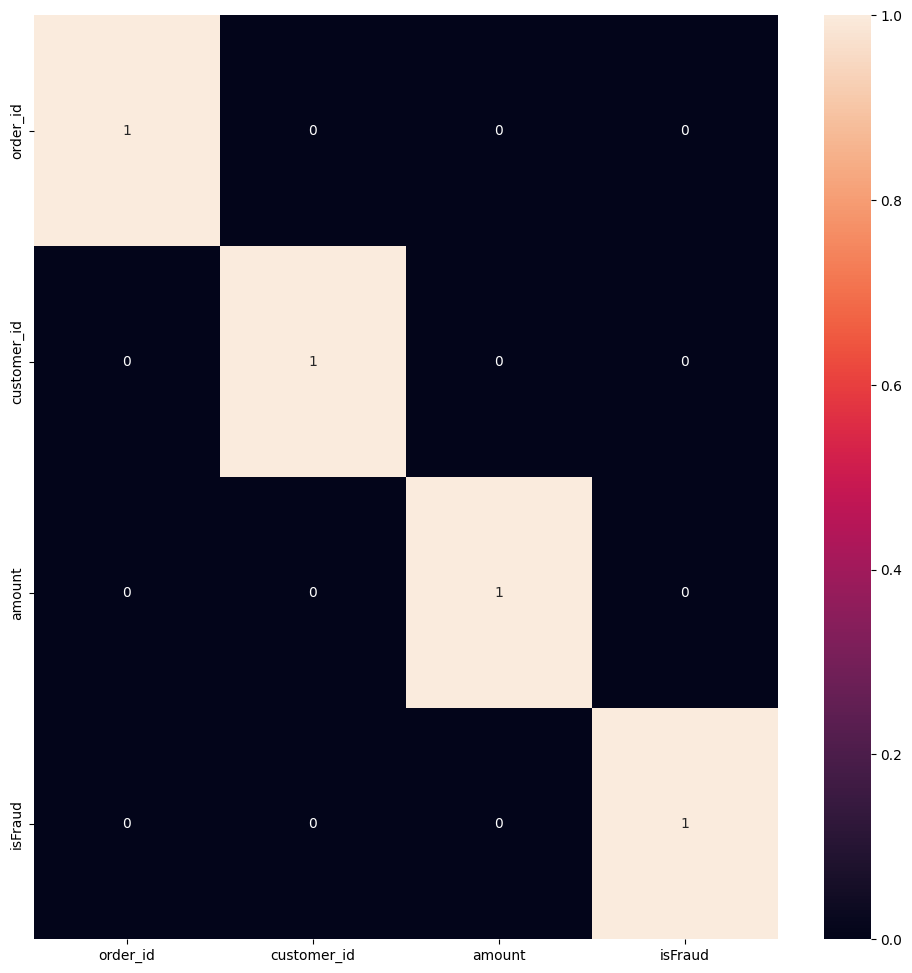

In [23]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=True)
plt.show()

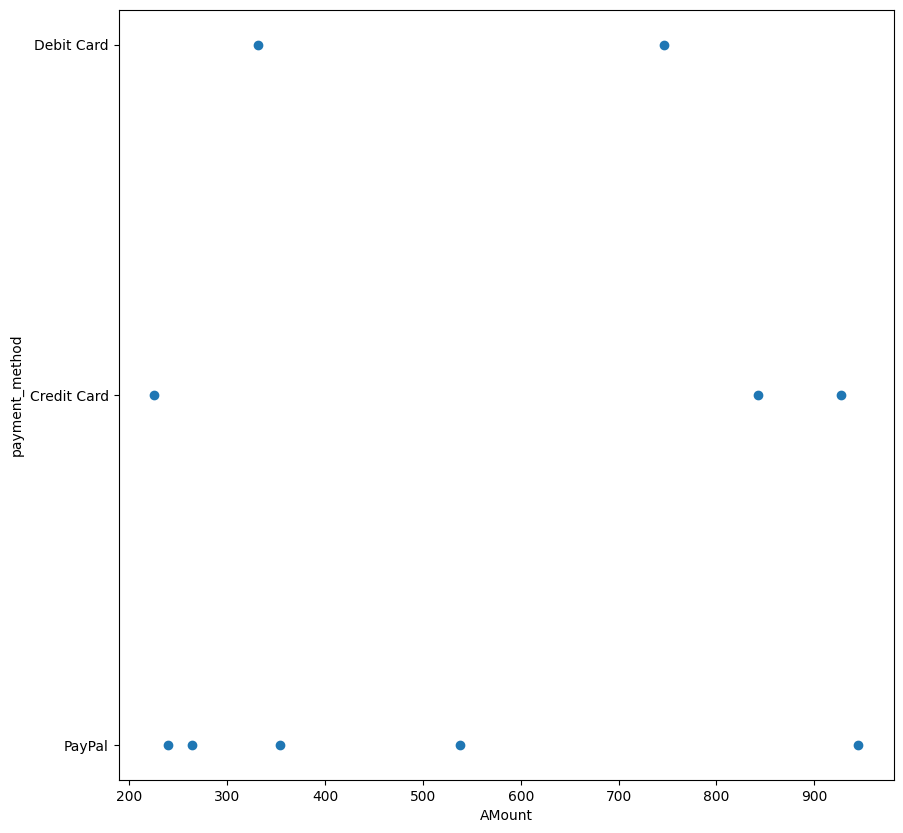

In [24]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(df['amount'],df['payment_method'])
ax.set_xlabel('AMount')
ax.set_ylabel('payment_method')
plt.show()

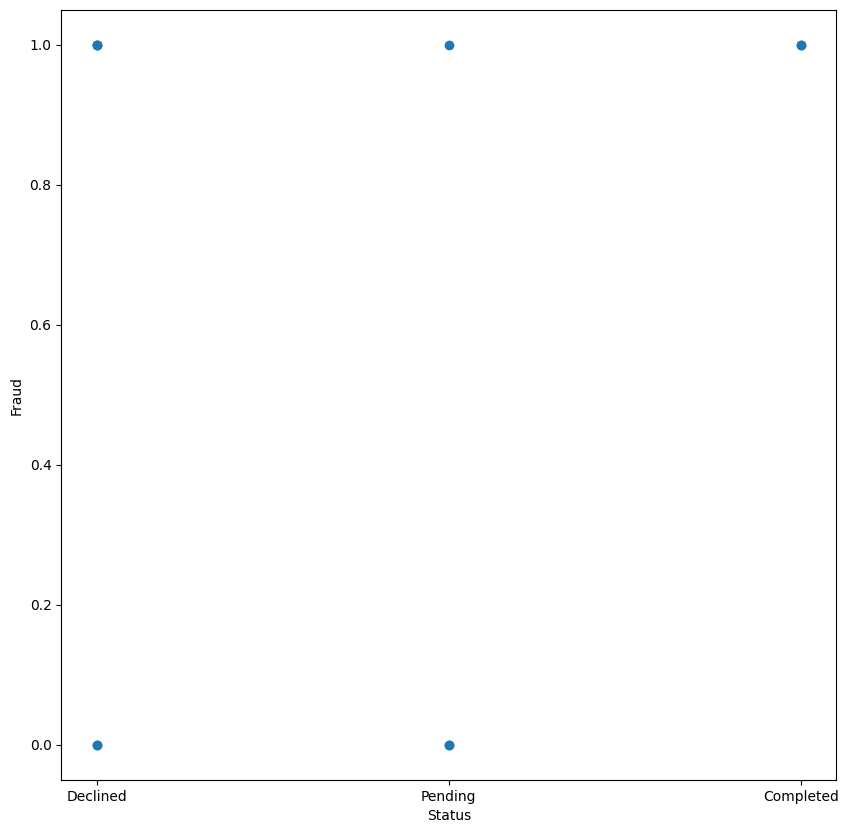

In [25]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(df['status'],df['isFraud'])
ax.set_xlabel('Status')
ax.set_ylabel('Fraud')
plt.show()

<AxesSubplot: >

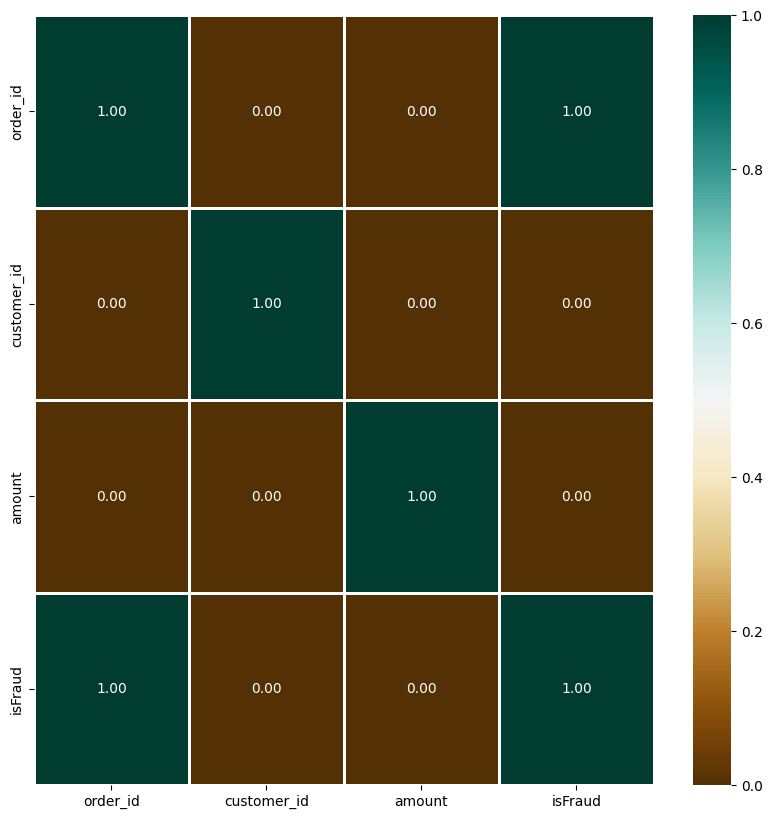

In [26]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr()>0.3,cmap='BrBG',fmt='.2f',linewidths=2,annot=True)